In [80]:
import pickle
import matplotlib.pyplot as plt
import pickle
import networkx as nx
import  functools
import math
import numpy as np
import os
from decimal import Decimal
from collections import OrderedDict
from sklearn.metrics import mean_squared_error
from scipy.stats import chisquare

In [147]:
import operator as op
def nCr(n,r):
    f = math.factorial
    return Decimal(f(n)) / (Decimal(f(r)) * Decimal(f(n-r)))

def calculatep(N,k,pi):
    return nCr(N-1,k)*Decimal(pow(pi,k))*Decimal(pow(1-pi,N-1-k))


def setplot(plt):
   
    ax = plt.subplot(111) 

    ax.spines["top"].set_visible(False)  
    ax.spines["bottom"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False)

    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    return plt,ax


In [3]:
target="Com"
G=pickle.load(open('{}/Graph.pickle'.format(target),"rb"))
waveMatrix=pickle.load(open('{}/waveMatrix.pickle'.format(target),"rb"))
skip=pickle.load(open('{}/skip.pickle'.format(target),"rb"))
nodeNames=pickle.load(open('{}/Correlations/o3/2017/nodeNames.pickle'.format(target),"rb"))

In [5]:
networkDetails=open('{}/CorrelationSummary/networkfeautures.csv'.format(target),'r').readline().strip().split(',')

In [13]:
try:
    cluster=pickle.load(open('{}/cluster.pickle'.format(target),'rb'))
    degree=pickle.load(open('{}/degree.pickle'.format(target),'rb'))
except:
    cluster=nx.clustering(G,weight='weight')
    degree=nx.degree(G,weight='weight')
    pickle.dump(cluster,open('{}/cluster.pickle'.format(target),'wb'))
    pickle.dump(degree,open('{}/degree.pickle'.format(target),'wb'))
    
kmean=float(networkDetails[3])
pi=float(networkDetails[-2])
N=len(degree)
Cavg=float(networkDetails[-1])

532.7791419037055381131095540 145


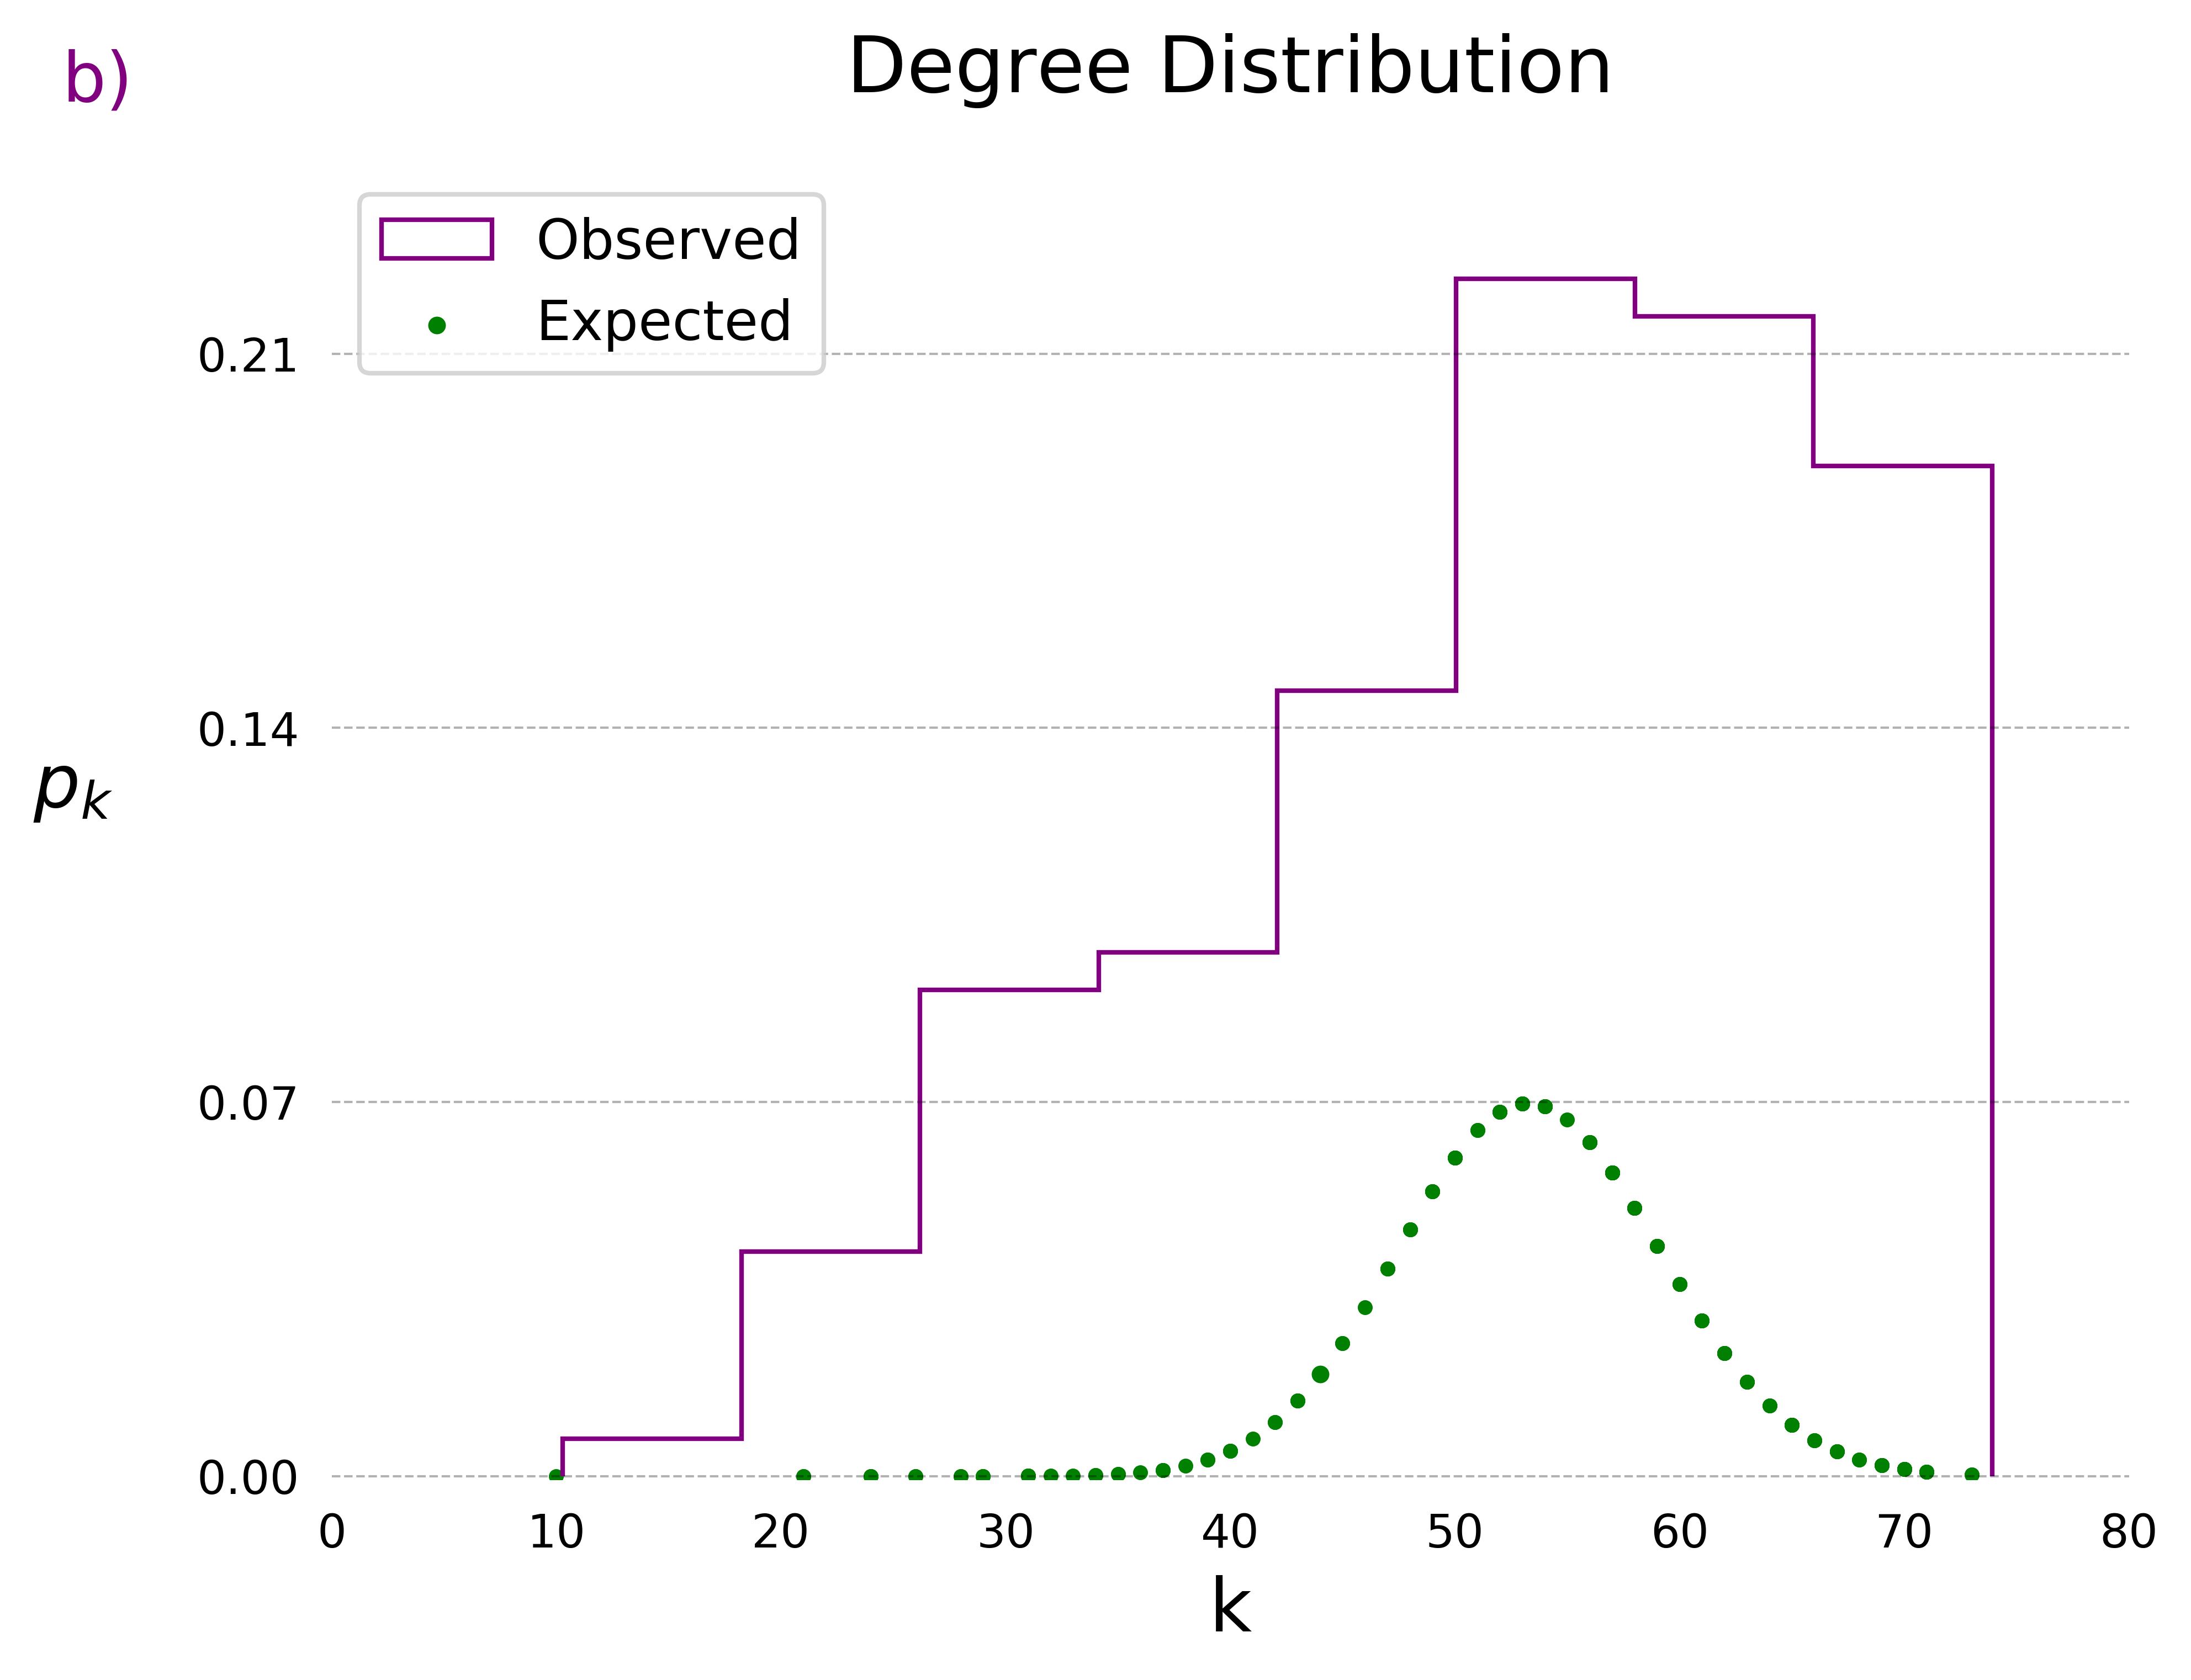

In [163]:
#Figure 1 A Replication
plt.close()

plt.figure(figsize=(7, 5.25),dpi=600)    
ax = plt.subplot(111) 

ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

ax.text(-0.15, 1.05, 'b)', transform=ax.transAxes, size=15,color='purple')

#for i in degree:
#plt.scatter([i[1] for i in degree])
n,bins,_=plt.hist([i[1] for i in degree],bins=8,histtype='step',color='purple',label='Observed')



n=[int(i) for i in n]
tempx,tempy=[],[]
summ=0
for key in degree:
    k=int(key[1])
    p=calculatep(N,k,pi)*N
    summ+=p
    tempx.append
    tempy.append(p)
    plt.scatter(k,p,color='g',s=5)
print(summ,N)
plt.scatter(k,p,color='g',s=8,label='Expected')  


#plt.plot([i for i in natureC],[i*N for i in y_predicted],'-o')

gap=10
plt.yticks([i for i in np.arange(0.0,max(n),gap)],["{0:.2f}".format(i/N) for i in np.arange(0,max(n),gap)])
# plt.xticks(fontsize=14)
plt.xlim(0,80)
plt.ylim(-0.1,35)
for y in range(0, 44, gap):     
    plt.plot(range(0, 102), [y] * len(range(0, 102)), "--", lw=0.5, color="black", alpha=0.3)

plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  
plt.legend(loc='upper left',prop={'size': 12})
plt.ylabel('$p_{k}$          ',fontsize=16,rotation=0)
plt.xlabel("k",fontsize=16)
plt.text(40, 37, "Degree Distribution", fontsize=17, ha="center")
plt.savefig("Com/images/Figure1/DegreeDistribution.png",bbox_inches='tight')
plt.show()

In [62]:
print(n,bins)

[1, 6, 13, 14, 21, 32, 31, 27] [ 10.28611768  18.23941729  26.1927169   34.14601651  42.09931612
  50.05261573  58.00591534  65.95921495  73.91251457]


In [76]:
natureC=OrderedDict()
for i in range(len(bins)-1):
    avg=int((bins[i]+bins[i+1])/2)
    natureC[avg]=(n[i]/145,float(calculatep(145,avg,pi)))
    print(bins[i],bins[i+1],avg)

10.2861176766 18.2394172877 14
18.2394172877 26.1927168988 22
26.1927168988 34.1460165099 30
34.1460165099 42.099316121 38
42.099316121 50.0526157321 46
50.0526157321 58.0059153432 54
58.0059153432 65.9592149543 61
65.9592149543 73.9125145654 69


In [79]:
y_actual=[natureC[i][0] for i in natureC]
y_predicted=[natureC[i][1] for i in natureC]
rms = pow(mean_squared_error(y_actual, y_predicted),0.5)
print(rms)

0.124080846232


In [81]:
chisquare(y_actual, f_exp=y_predicted)

Power_divergenceResult(statistic=733014166.08354807, pvalue=0.0)

In [85]:
nx.average_shortest_path_length(G,weight='weight')

0.14119189465965626

In [110]:
def calculateBins(d):
    q1=np.percentile(d,25)
    q3=np.percentile(d,75)
    h=(q3-q1)*2*pow(145,-1/3)
    return (max(d)-min(d))/h

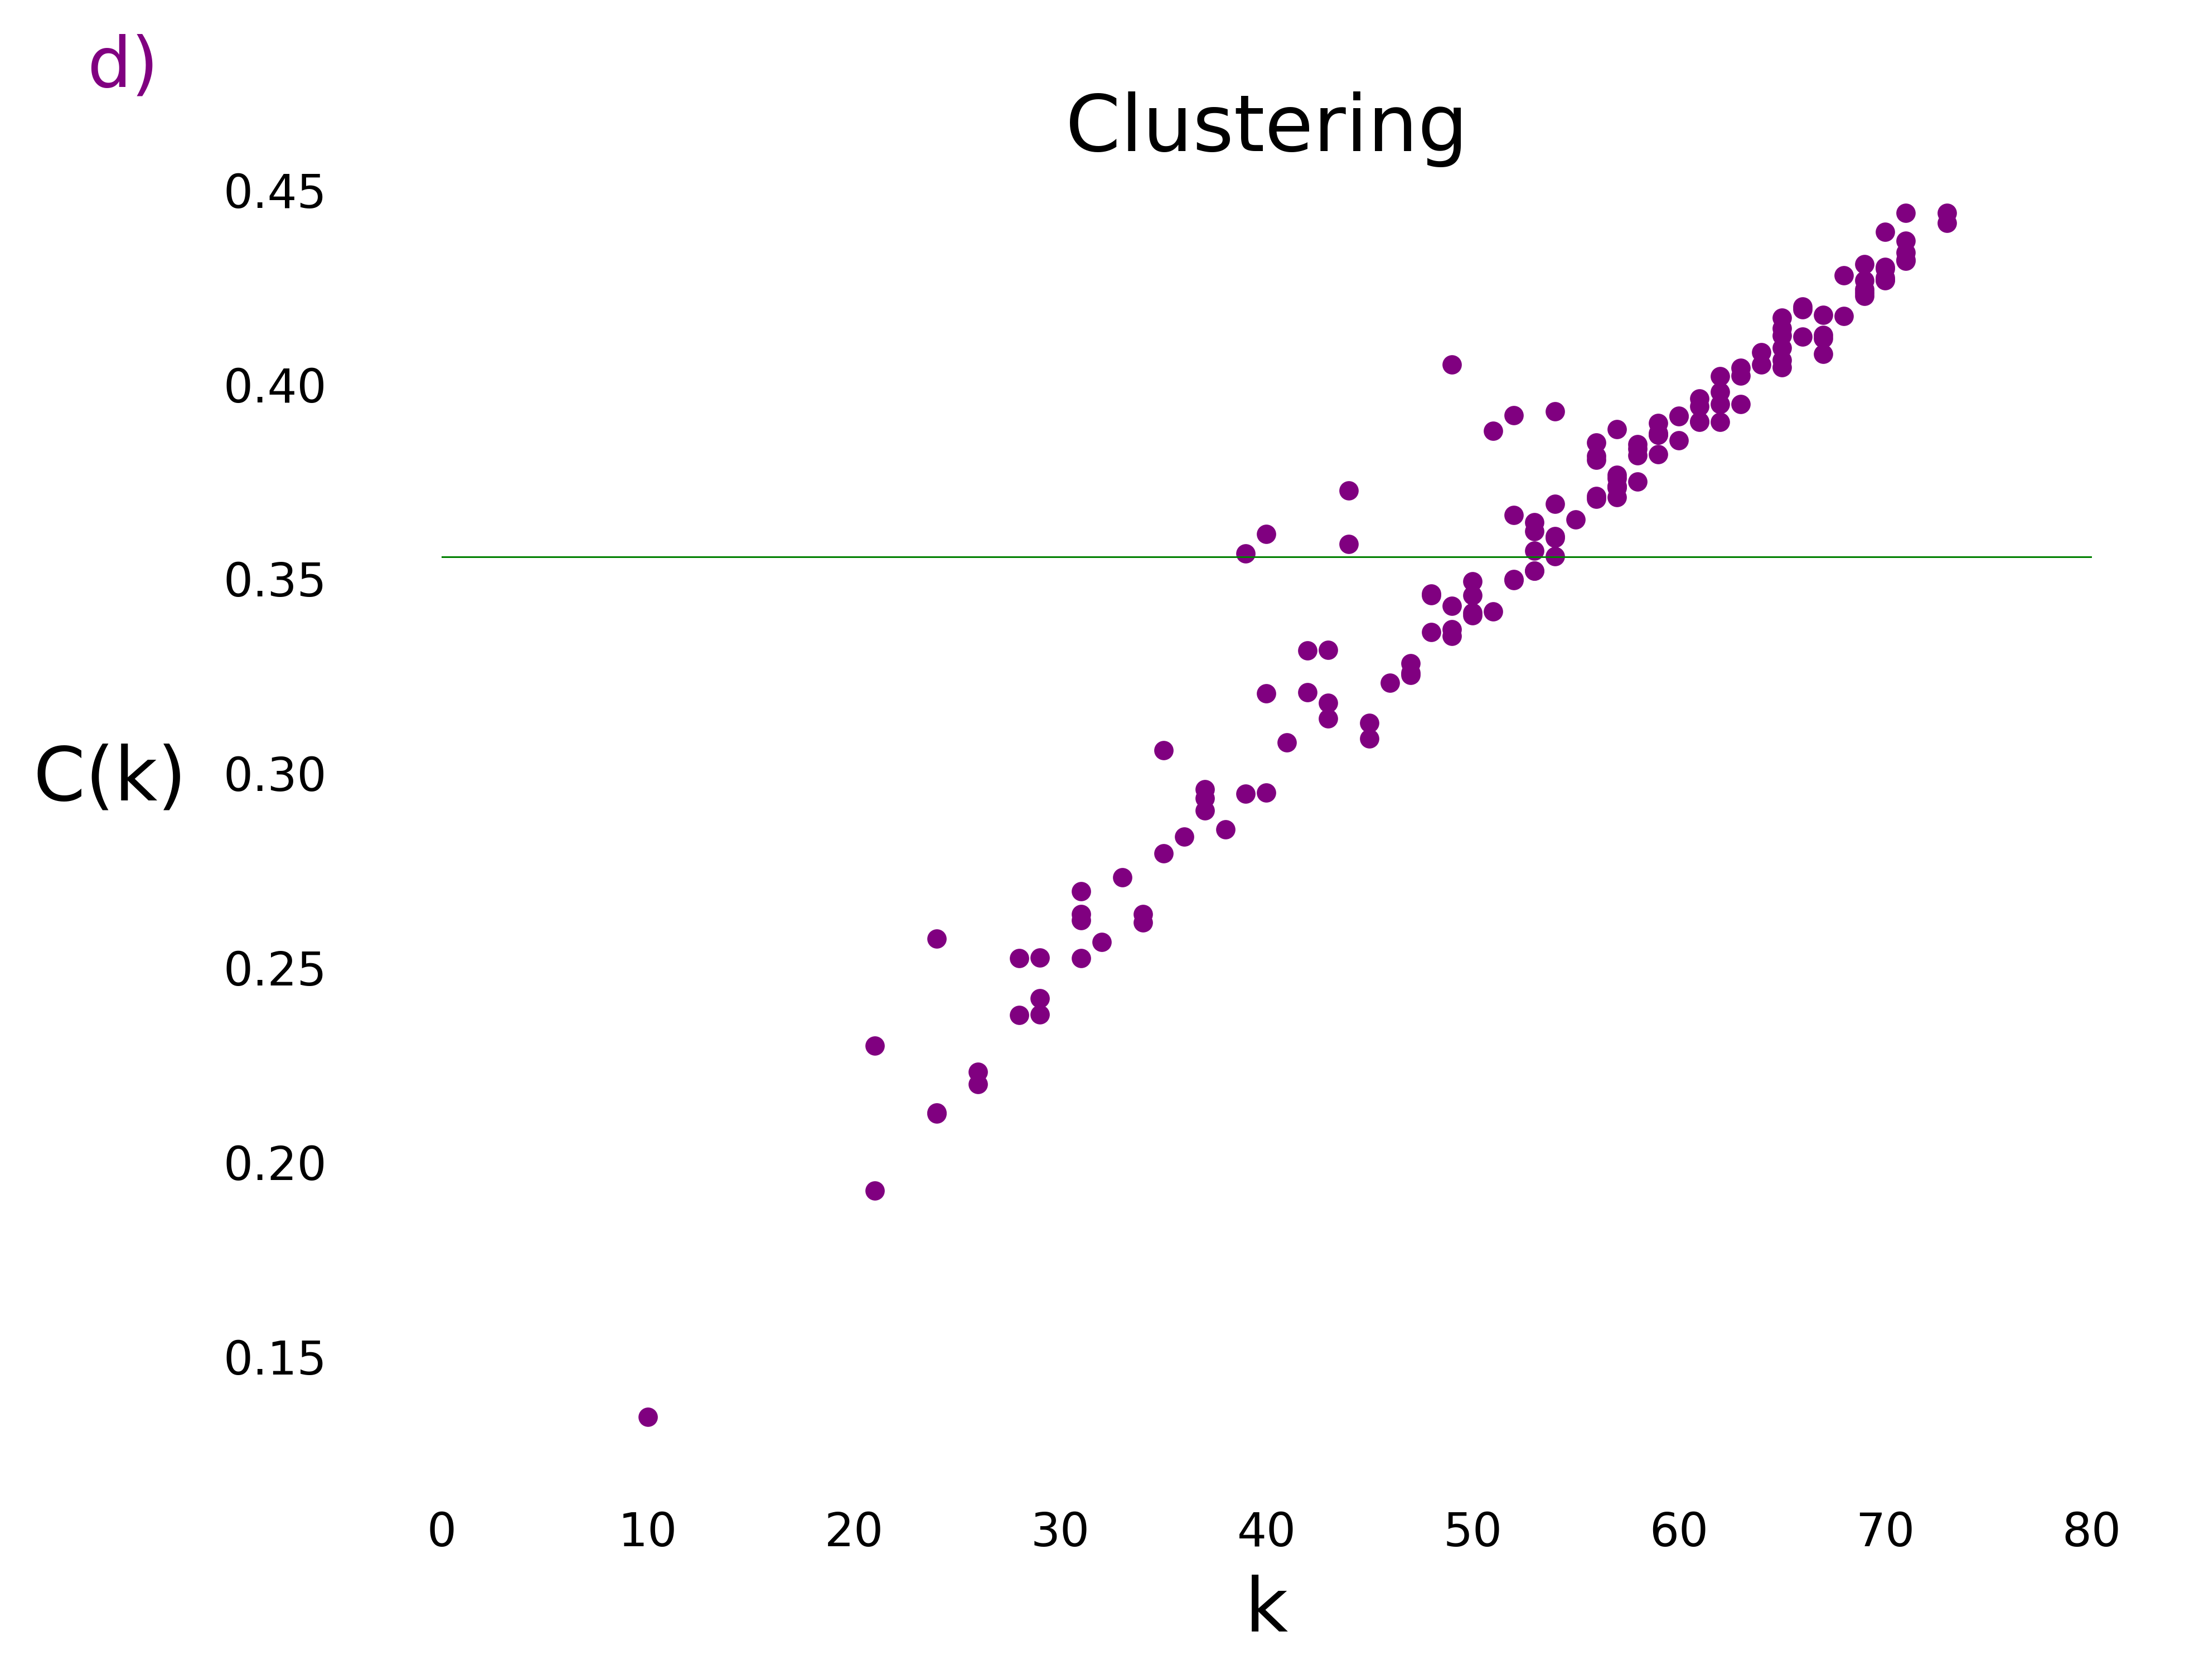

In [162]:
# Figure 1 B
plt.close()
plt.figure(figsize=(7, 5.25),dpi=600)    
plt,ax=setplot(plt)
ax.text(-0.15, 1.05, 'd)', transform=ax.transAxes, size=15,color='purple')

N=len(degree)

for key in degree:
    county=key[0]
    k=int(key[1])
    cc=cluster[county]
    p=calculatep(N,k,pi)
    plt.hlines(Cavg,0,80,color='g',linewidth=0.3)
    plt.scatter(k,cc,color='purple',s=10)
    

# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)


plt.tick_params(axis="both", which="both", bottom="off", top="off",labelbottom="on", left="off", right="off", labelleft="on")  
plt.ylabel('C(k)        ',fontsize=16,rotation=0)
plt.xlabel("k",fontsize=16)
plt.text(40, 0.46, "Clustering", fontsize=17, ha="center")
plt.savefig("Com/images/clusteringcoefficient.png",bbox_inches='tight')
plt.show()

In [13]:
for key in degree:
    county=key[0]
    k=key[1]
    cc=cluster[county]
    calculatep(N,)
    plt.scatter(k,k/N,color='purple',s=10)
    plt.xlabel('k')
    plt.ylabel('C(k)')
plt.show()

178

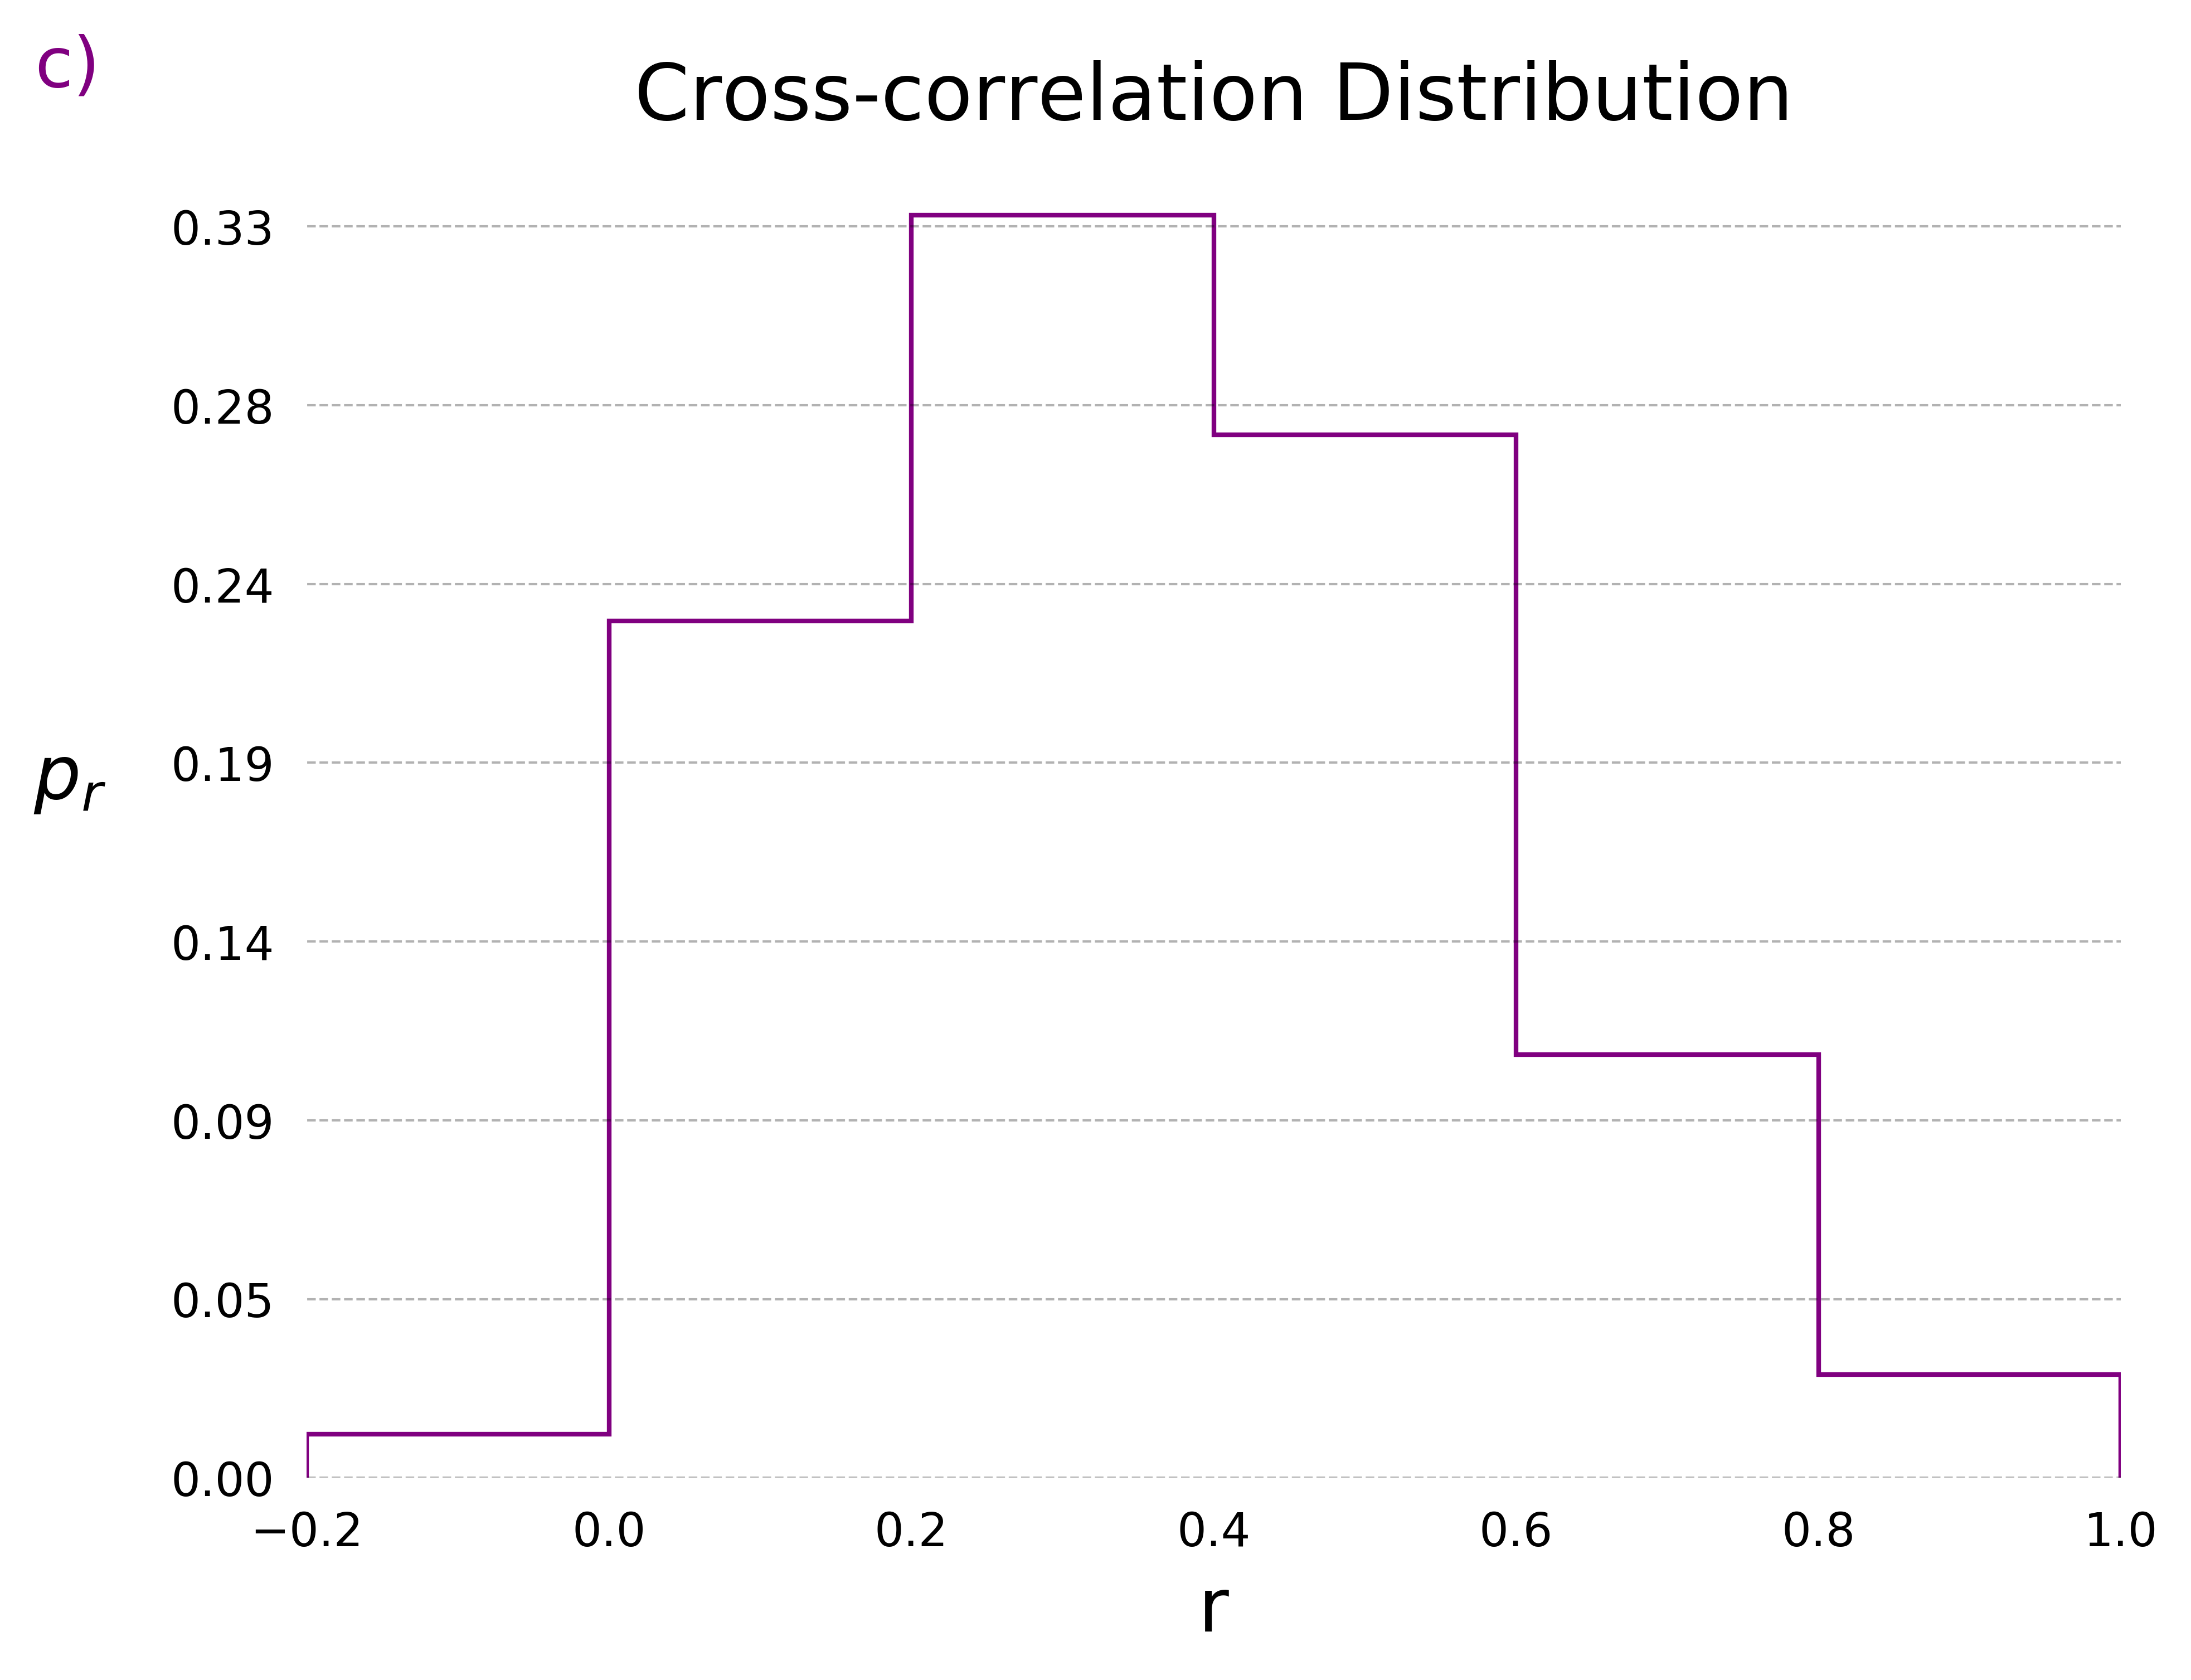

In [202]:
# Figure 1 C
temp=[]
for i in range(len(waveMatrix)):
    for j in range(i+1,len(waveMatrix)):
        x,y=nodeNames[i],nodeNames[j]
        if x not in skip and y not in skip:
            temp.append(waveMatrix[i,j])
            
plt.close()
plt.figure(figsize=(7, 5.25),dpi=600)   

plt,ax=setplot(plt)
ax.text(-0.15, 1.05, 'c)', transform=ax.transAxes, size=15,color='purple')
n1,bins1,_=plt.hist(temp,bins=[-0.2,0,0.2,0.4,0.6,0.8,1],histtype='step',color='purple')
uppery=3500+500
plt.xlim(-0.2,1.0)
#plt.ylim(0,uppery)
for y in range(0, uppery, 500):     
    plt.plot(range(-1, 2), [y] * len(range(-1, 2)), "--", lw=0.5, color="black", alpha=0.3)

N=len(waveMatrix)
gap=500
denum=N*(N-1)/2

plt.yticks([i for i in np.arange(0,uppery,gap)],["{0:.02f}".format(i/denum) for i in range(0,uppery,gap)])
plt.tick_params(axis="both", which="both", bottom="off", top="off",labelbottom="on", left="off", right="off", labelleft="on")  
plt.ylabel('$p_{r}$        ',fontsize=16,rotation=0)
plt.xlabel("r",fontsize=16)
plt.text(0.40, 3800, "Cross-correlation Distribution", fontsize=17, ha="center")
plt.savefig("Com/images/Figure1/correlationDistribution.png",bbox_inches='tight')



plt.show()

In [116]:
calculateBins(temp)
#calculateBins([i[1] for i in degree])

9.5485804164463257

In [188]:
plt.hist?

In [198]:
for i in range(len(n1)):
    print(bins1[i],':',bins1[i+1],'::',n1[i],n1[i]*100/10440)
sum(n1)

-0.2 : 0.0 :: 122.0 1.16858237548
0.0 : 0.2 :: 2397.0 22.9597701149
0.2 : 0.4 :: 3531.0 33.8218390805
0.4 : 0.6 :: 2917.0 27.9406130268
0.6 : 0.8 :: 1184.0 11.3409961686
0.8 : 1.0 :: 289.0 2.76819923372


10440.0

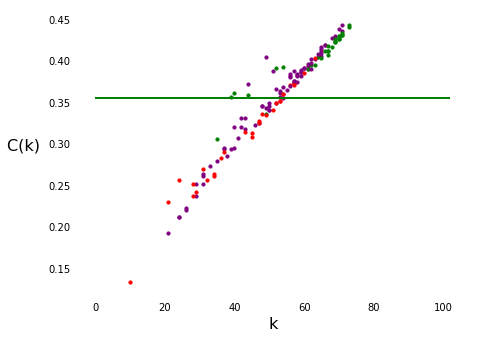

In [132]:
# Figure 2

carbA=[6,41,53,35]
carbB=[36,9,10,23,24,25,34,42,50,11]

plt.close()
plt.figure(figsize=(7, 5.25))    
plt=setplot(plt)
N=len(degree)

for key in degree:
    county=key[0]
    k=int(key[1])
    cc=cluster[county]
    p=calculatep(N,k,pi)
    plt.hlines(Cavg,0,102,color='g',linewidth=0.3)
    state=int(county.split('-')[0])
    
    if state in carbA:
        plt.scatter(k,cc,color='red',s=10)
    elif state in carbB:
        plt.scatter(k,cc,color='green',s=10)
    else:
        plt.scatter(k,cc,color='purple',s=10)

# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)


plt.tick_params(axis="both", which="both", bottom="off", top="off",labelbottom="on", left="off", right="off", labelleft="on")  
plt.ylabel('C(k)        ',fontsize=16,rotation=0)
plt.xlabel("k",fontsize=16)
#plt.savefig("Com/images/clusteringcoefficient3.png",bbox_inches='tight')
plt.show()

10


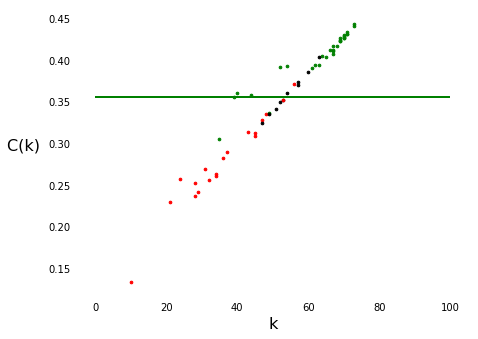

In [134]:
# Figure 2

NA=pickle.load(open("NA/NAShrink.pickle","rb"))
NACode=[str(int(i.split('/')[0]))+'-'+str(int(i.split('/')[1])) for i in NA.keys() if NA[i]=='Severe-15' or NA[i]=='Extreme']

plt.close()
plt.figure(figsize=(7, 5.25))    
plt=setplot(plt)
N=len(degree)
count=0
for key in degree:
    county=key[0]
    k=int(key[1])
    cc=cluster[county]
    p=calculatep(N,k,pi)
    plt.hlines(Cavg,0,100,color='g',linewidth=0.3)
    state=int(county.split('-')[0])
    countyName=int(county.split('-')[1])
    
    if str(state)+'-'+str(countyName) in NACode:
        plt.scatter(k,cc,color='black',s=7)
        count+=1
    elif state in carbA:
        plt.scatter(k,cc,color='red',s=7)
    elif state in carbB:
        plt.scatter(k,cc,color='green',s=7)
    else:
        pass
        #plt.scatter(k,cc,color='purple',s=7)

# plt.yticks(fontsize=14)
# plt.xticks(fontsize=14)

print(count)
plt.tick_params(axis="both", which="both", bottom="off", top="off",labelbottom="on", left="off", right="off", labelleft="on")  
plt.ylabel('C(k)        ',fontsize=16,rotation=0)
plt.xlabel("k",fontsize=16)
#plt.savefig("Com/images/clusteringcoefficient3.png",bbox_inches='tight')
plt.show()

In [135]:
nx.average_shortest_path_length(G,weight='weight')

0.14119189465965626

In [40]:
conc.keys()

odict_keys(['2014', '2015', '2016'])

In [29]:
from networkx.algorithms import community

def bisectGraph(G,name1,name2):
    c=community.kernighan_lin_bisection(G,weight='weight')
    pickle.dump(list(c[0]),open("community/a/{}.pickle".format(name1),"wb"))
    pickle.dump(list(c[1]),open("community/a/{}.pickle".format(name2),"wb"))
    print('py -3 plotBasemap.py {}'.format(name1))
    a=os.system('py -3 plotBasemap.py "{}"'.format(name1))
    b=os.system('py -3 plotBasemap.py "{}"'.format(name2))
    print(a,b)
    print('Done!')
    return G.subgraph(c[0]),G.subgraph(c[1])

In [30]:
G1,G2=bisectGraph(G,1,2)

py -3 plotBasemap.py 1
1 1
Done!


In [31]:
G21,G22=bisectGraph(G2,21,22)

py -3 plotBasemap.py 21
1 1
Done!


In [32]:
G211,G212=bisectGraph(G21,211,212)

py -3 plotBasemap.py 211
1 1
Done!


In [33]:
G11,G12=bisectGraph(G1,11,12)

py -3 plotBasemap.py 11
1 1
Done!


In [34]:
G111,G112=bisectGraph(G11,111,112)

py -3 plotBasemap.py 111
1 1
Done!


In [241]:
communities_generator = community.girvan_newman(G,weight='weight')
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
c2=sorted(map(sorted, next_level_communities))

TypeError: girvan_newman() got an unexpected keyword argument 'weight'

In [237]:
f=open("ozoneNonattainment.txt","r")
l=f.readline()
print(l.strip().split('\t'))

['ARIZONA', 'Gila County', 'Phoenix-Mesa, AZ', 'Part', '56', '04/007']


In [242]:
from mpl_toolkits.basemap import Basemap


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [38]:
145**0.5

12.041594578792296

In [203]:
for i in range(0,10):
    for j in range(5,8):
        print(i,j)
        break

0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
8 5
9 5


In [204]:
Cavg

0.3555093056018834

In [205]:
0.40/0.35

1.142857142857143

In [207]:
62.33/kmean

1.1677053808452758